In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("C:\\Users\\DELL\\Desktop\\my work")

In [3]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
# filling null value
df['Postal Code'].fillna(0, inplace=True)
df['Postal Code'] = df['Postal Code'].astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
#checking for duplicates
if df.duplicated().sum()>0:
    print('Duplicate exists')
else:
    print('Duplicates dont exist')

Duplicates dont exist


In [7]:
# types of customers (got from segment)
types_of_customers = df["Segment"].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [8]:
# number of customers in each segment 
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns ={"Segment": "type_of_customers"})
print(number_of_customers)

  type_of_customers  count
0          Consumer   5101
1         Corporate   2953
2       Home Office   1746


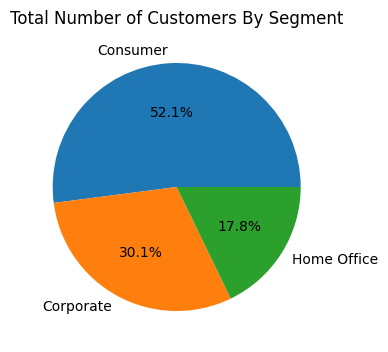

In [9]:
plt.figure(figsize=(4,5))
plt.pie(number_of_customers['count'], labels=number_of_customers['type_of_customers'], autopct='%1.1f%%')
plt.title("Total Number of Customers By Segment")
plt.savefig('pie.png')

### exploring how to balance resource allocation to all 3 segments to maximize growth 
intergrating customer data with sales data. this analysis will help us identify which
segments generate most revenue percustomer, average order value and overall profitability customer lifetime value.

Aditionally, we can segment customers by purchase frequency and basket size to understand thier buying behaviour within each segment

More questions to consider for a comprehensive analysis;
Customer Aqusition Cost(CAC): How much does it cost to aquire a customer in each segment?
Customer Satisfaction: How satisfied are customers in each segment?
Churn rate: what is the rate at which leave in each segment?

by analyzing these factors along revenue and customer lifetime value, we can create a customer segmentation model that prioritizes 
segments based on thier overall value and growth potential.

In [10]:
#sales per segment
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'type_of_customers', 'Sales': 'total_sales'})
print(sales_per_segment)

  type_of_customers   total_sales
0          Consumer  1.148061e+06
1         Corporate  6.884941e+05
2       Home Office  4.249822e+05


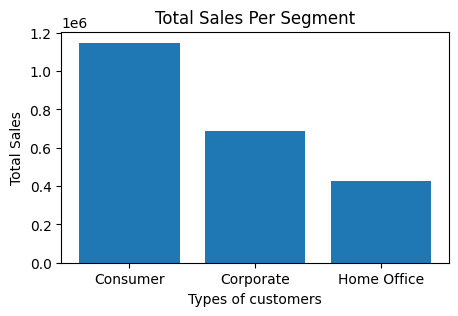

In [11]:
#plotting a bargraph
plt.figure(figsize=(5,3))
plt.bar(sales_per_segment["type_of_customers"],sales_per_segment["total_sales"])
plt.title("Total Sales Per Segment")
plt.xlabel("Types of customers")
plt.ylabel("Total Sales")
plt.show()

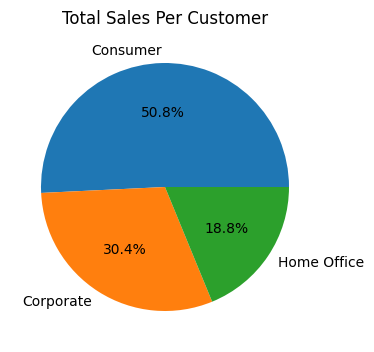

In [12]:
plt.figure(figsize=(4,5))
plt.pie(sales_per_segment["total_sales"], labels=sales_per_segment["type_of_customers"], autopct='%1.1f%%')
plt.title('Total Sales Per Customer')
plt.show()

(CLTV)customer lifetime value by calculating revenue of segment of customers over time to determine which segment brings more money
it helps in marketing eg if you find the home office customers have a high CLTV than the consumer segment you may want to invest in  
marketing campaighns targeting the home office segment,Market research, Conduct.

Market research to understand the specific needs and preferences of each customer segment, this will inform the development of targeted 
marketing campaighn eg you may find out that consumers in the data are more price sensitive and corporate customers are more interested in
discounts and more reliable service. you can tailer this information to send messages to each segment.
    
Average Order Value analyzed; average order value by segment to identify opportunities to increase revenue per customer eg your analysis 
says that corporate customers have a higher order average than consumers you could develop marketing campaigns that encourage consumers 
to purchase bundles or higher priced products to increase thier average order value.

Customer Aqusition Cost: how much does it cost to aquire a customer in each segment. Knowing CAC can help determine the return on investment(ROI)
for marketing efforts eg. it costs 100 dollars to aquire a corporate customer but it costs 20 dollars to aquire a consumer customer if the CLTV of the 
corporate customer is higher than the CLTV of a consumer customer then spending $100 to auire a corporate customer is still profitable 
however if the CLTV of the corporate customer is slightly higher than that of the consumers CLTV you may want to focus your marketing efforts 
on aquiring more consumers because the cost of aquisition is much lower.

Customer Satisfaction: How satisfied are customers in each segment? Understanding satisfaction levels can help identify areas for improvement 
and reduce churn. eg you can conduct surveys or collect customer feedback to understand customer satisfaction levels. if you find corporate 
customers are less satisfied than consumers you may want to investigate the reasons for thier disatisfaction and amke changes to improve thier 
experience this could involve improving your customer service offering more competitive prices for the corporate customers or developing services
that benefit the corporate customers.

#### customer loyalty
you want loyal customers to stay happy and keep coming back and also bring in new people so you will reduce the cost of aqusition os new 
customers, also increase revenue or keep it constant

customer loyality calculation: rank customers by orders or how much they have spent
How to strengthen relationship with customer?
- design email specificaly for those high value segments to actively offer them personalized support which could suggest, How can we assist
  you today this demonsatrates commitment to thier success and also adress potential issues.
- loyalty programmes eg personalized discounts , point based reward systms, target promotions based on past purchase history.
- customer feedback loops; implement surveys or invite them to to perticipate in focus groups this demonstrates you value thier input and actively using feedback to improve customer experience
- Community building, eg online forums.

In [13]:
# top customers by orders
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_order_frequency.rename(columns={'Order ID' : 'total orders', 'Segment' : 'type of customer'}, inplace=True)
repeat_customers = customer_order_frequency[customer_order_frequency['total orders']>=1]
repeat_customers = repeat_customers.sort_values(by="total orders", ascending=False)
print(repeat_customers.head(10).reset_index(drop=True))

  Customer ID        Customer Name type of customer  total orders
0    WB-21850        William Brown         Consumer            35
1    PP-18955           Paul Prost      Home Office            34
2    MA-17560         Matt Abelman      Home Office            34
3    JL-15835             John Lee         Consumer            33
4    CK-12205  Chloris Kastensmidt         Consumer            32
5    SV-20365          Seth Vernon         Consumer            32
6    JD-15895     Jonathan Doherty        Corporate            32
7    AP-10915       Arthur Prichep         Consumer            31
8    ZC-21910     Zuschuss Carroll         Consumer            31
9    EP-13915           Emily Phan         Consumer            31


In [14]:
# ranking customers by sales
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
top_spenders = customer_sales.sort_values('Sales', ascending=False)
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


- We can see that the top customers who make regular orders donot top as customers who brought the most revenue to the company.

### SHIPPING

In [15]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model.rename(columns={'Ship Mode':'Mode of Shipment'}, inplace=True)
print(shipping_model)

  Mode of Shipment  count
0   Standard Class   5859
1     Second Class   1902
2      First Class   1501
3         Same Day    538


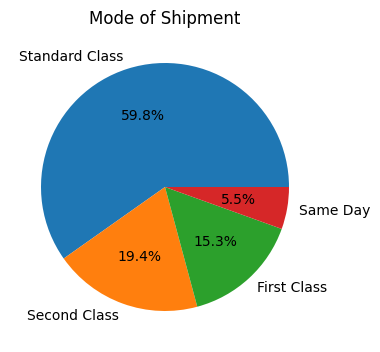

In [16]:
plt.figure(figsize=(4,5))
plt.pie(shipping_model['count'],labels=shipping_model['Mode of Shipment'], autopct='%1.1f%%')
plt.title('Mode of Shipment')
plt.show()

most popular mode of shipment is satandard class ~ 60%  and rest combined is ~ 40%

as a superstore, you invest in shipping so you endup buying deals with the shipping companies eg DHL etc
sometimes you can recomend the wrong option  eg second class is fast but it ends up costin the customer way too much and
the customer ends up not purchasing the product and this decreases the purchase order.

you can have a button that recommends the most populars option which fast and most of the time people will choose the most porpular option. this
will help the superstore save the cost of investment in other shipping modes.

#### Geopgraphical Analysis

In [17]:
#orders by state
state = df['State'].value_counts().reset_index()
state.rename(columns={ 'State':'Number of customers'}, inplace=True)
print(state.head(20))

   Number of customers  count
0           California   1946
1             New York   1097
2                Texas    973
3         Pennsylvania    582
4           Washington    504
5             Illinois    483
6                 Ohio    454
7              Florida    373
8             Michigan    253
9       North Carolina    247
10            Virginia    224
11             Arizona    223
12           Tennessee    183
13            Colorado    179
14             Georgia    177
15            Kentucky    137
16             Indiana    135
17       Massachusetts    135
18              Oregon    122
19          New Jersey    122


most popular state is california, and least state is New Jersey

conclusion:
- work on new jersey more to increase order count
- keep california happy.

In [18]:
# orders by city
city = df['City'].value_counts().reset_index()
print(city.head())

            City  count
0  New York City    891
1    Los Angeles    728
2   Philadelphia    532
3  San Francisco    500
4        Seattle    426


In [19]:
# sales by state
top_sales = df.groupby('State')['Sales'].sum().reset_index()
top_sales = top_sales.sort_values('Sales', ascending=False).reset_index(drop=True)
print(top_sales.head(10))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [20]:
#sales per city
City_sales = df.groupby('City')['Sales'].sum().reset_index()
City_sales = City_sales.sort_values('Sales', ascending=False).reset_index(drop=True)
print(City_sales.head(10))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


#### PRODUCTS

In [21]:
#top performing products
products = df.Category.unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [22]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [23]:
#how many sub-categories are in the products
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values("Sub-Category", ascending=False).reset_index()
print(subcategory_count)

   index         Category  Sub-Category
0      1  Office Supplies             9
1      0        Furniture             4
2      2       Technology             4


In [24]:
# top performing sub-category
subcategory_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
subcategory_sales = subcategory_sales.sort_values('Sales', ascending=False).reset_index(drop=True)
print(subcategory_sales)

           Category Sub-Category        Sales
0        Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
2   Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
4   Office Supplies      Binders  200028.7850
5        Technology     Machines  189238.6310
6        Technology  Accessories  164186.7000
7        Technology      Copiers  146248.0940
8         Furniture    Bookcases  113813.1987
9   Office Supplies   Appliances  104618.4030
10        Furniture  Furnishings   89212.0180
11  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
13  Office Supplies          Art   26705.4100
14  Office Supplies    Envelopes   16128.0460
15  Office Supplies       Labels   12347.7260
16  Office Supplies    Fasteners    3001.9600


In [25]:
# import plotly.express as px
# subcategorybysales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

# # nested piechart
# figure.figsize=[10,8]
# fig = px.sunburst(subcategorybysales, path=['Category','Sub-Category'], values='Sales')
# fig.update_layout(title='Total sales per product and sub-category')
# fig.show()

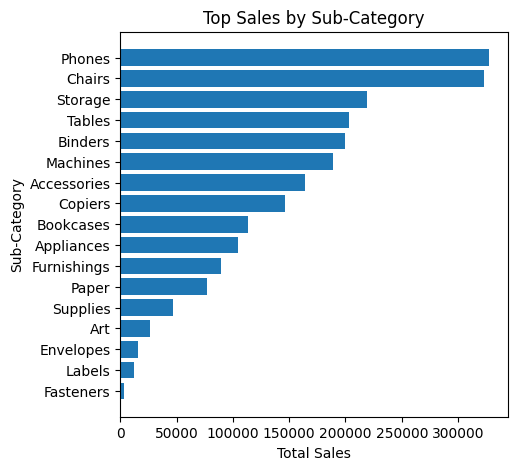

In [26]:
subcategory_sales = subcategory_sales.sort_values('Sales', ascending=True)
plt.figure(figsize=[5,5])
plt.barh(subcategory_sales['Sub-Category'], subcategory_sales['Sales'])
plt.title("Top Sales by Sub-Category")
plt.xlabel("Total Sales")
plt.ylabel('Sub-Category')
plt.show()

In [27]:
# top performing category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
category_sales = category_sales.sort_values('Sales', ascending=False)
print(category_sales)

          Category        Sales
2       Technology  827455.8730
0        Furniture  728658.5757
1  Office Supplies  705422.3340


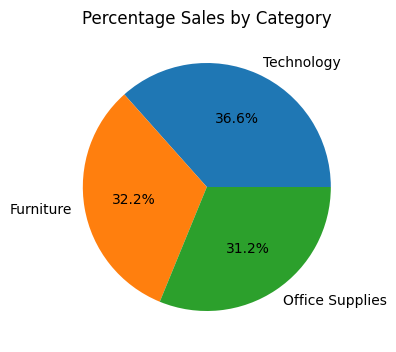

In [28]:
plt.figure(figsize=[4,5])
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%')
plt.title("Percentage Sales by Category")
plt.show()

#### Sales trend

In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
Yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
Yearly_sales = Yearly_sales.rename(columns={'Order Date': 'Years', 'Sales':'Total_sales'})
print(Yearly_sales)

   Years  Total_sales
0   2015  479856.2081
1   2016  459436.0054
2   2017  600192.5500
3   2018  722052.0192


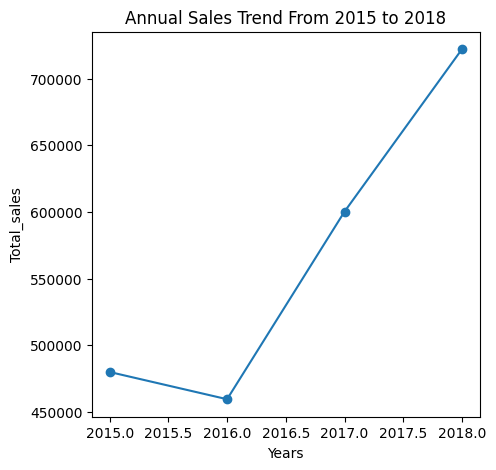

In [30]:
plt.figure(figsize=[5,5])
plt.plot(Yearly_sales['Years'], Yearly_sales['Total_sales'], marker='o', linestyle='-')
plt.title("Annual Sales Trend From 2015 to 2018")
plt.ylabel("Total_sales")
plt.xlabel("Years")
plt.show()

In [31]:
# Quaterly sales
df['Order Date'] = pd.to_datetime(df["Order Date"], dayfirst=True)
annual_sales = df[df['Order Date'].dt.year==2018]
quaterly_sales = annual_sales.resample('Q', on='Order Date')['Sales'].sum().reset_index()
quaterly_sales = quaterly_sales.rename(columns={'Sales':'Q-Total sales', 'Order Date':'Quaters'})
print(quaterly_sales)

     Quaters  Q-Total sales
0 2018-03-31    122260.8842
1 2018-06-30    127558.6200
2 2018-09-30    193815.8400
3 2018-12-31    278416.6750


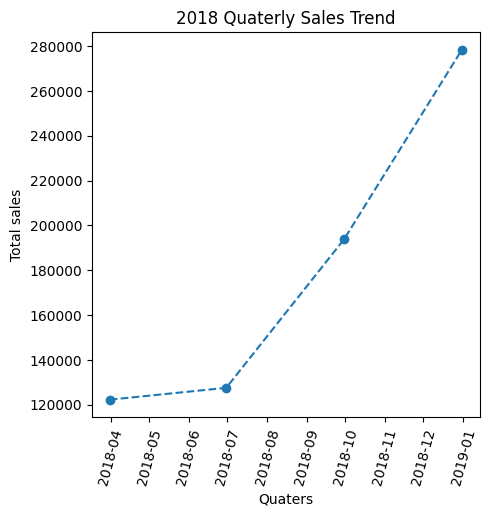

In [32]:
plt.figure(figsize=[5,5])
plt.plot(quaterly_sales['Quaters'], quaterly_sales['Q-Total sales'], marker='o', linestyle='--')
plt.title('2018 Quaterly Sales Trend')
plt.xticks(rotation=75)
plt.ylabel('Total sales')
plt.xlabel('Quaters')
plt.show()

In [33]:
#monthly trend
monthly_sales = annual_sales.resample('m', on='Order Date')['Sales'].sum().reset_index()
print(monthly_sales)

   Order Date        Sales
0  2018-01-31   43476.4740
1  2018-02-28   19920.9974
2  2018-03-31   58863.4128
3  2018-04-30   35541.9101
4  2018-05-31   43825.9822
5  2018-06-30   48190.7277
6  2018-07-31   44825.1040
7  2018-08-31   62837.8480
8  2018-09-30   86152.8880
9  2018-10-31   77448.1312
10 2018-11-30  117938.1550
11 2018-12-31   83030.3888


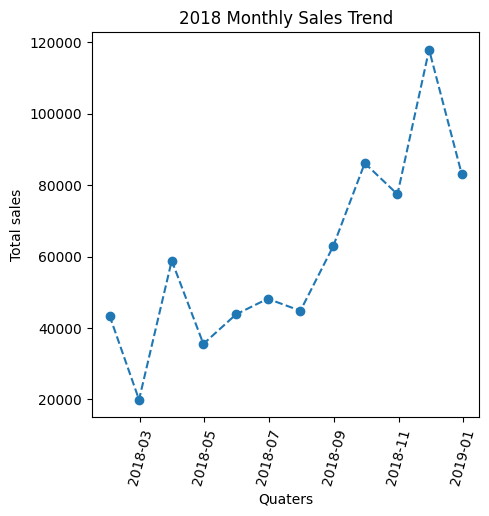

In [34]:
plt.figure(figsize=[5,5])
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', linestyle='--')
plt.title('2018 Monthly Sales Trend')
plt.xticks(rotation=75)
plt.ylabel('Total sales')
plt.xlabel('Quaters')
plt.show()